In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv("gamma.csv")
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [2]:
data.shape

(19020, 11)

In [3]:
data.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [4]:
import csv
my_reader = csv.reader(open('gamma.csv'))
ctr_g = 0
ctr_h = 0

for record in my_reader:
    if record[10] == 'g':
        ctr_g += 1
    elif record[10] == 'h':
        ctr_h += 1
        
print ('Broj instanci klase g: %d' % ctr_g)   # 65%
print ('Broj instanci klase h: %d' % ctr_h)   # 35%

Broj instanci klase g: 12332
Broj instanci klase h: 6688


In [5]:
# INFORMACIJE O ZNAČAJKAMA
# 1. fLength: continuous # major axis of ellipse [mm] 
# 2. fWidth: continuous # minor axis of ellipse [mm] 
# 3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
# 4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
# 5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
# 6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
# 7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
# 8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
# 9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
# 10. fDist: continuous # distance from origin to center of ellipse [mm] 
# 11. class: g,h # gamma (signal), hadron (background) 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
fLength     19020 non-null float64
fWidth      19020 non-null float64
fSize       19020 non-null float64
fConc       19020 non-null float64
fConc1      19020 non-null float64
fAsym       19020 non-null float64
fM3Long     19020 non-null float64
fM3Trans    19020 non-null float64
fAlpha      19020 non-null float64
fDist       19020 non-null float64
class       19020 non-null object
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [7]:
data.isnull().any().any()

False

In [8]:
import sklearn
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.20, random_state=42)
print('Broj primjera za treniranje: ' + str(len(data_train)))
print('Broj primjera za testiranje: ' + str(len(data_test)))

Broj primjera za treniranje: 15216
Broj primjera za testiranje: 3804


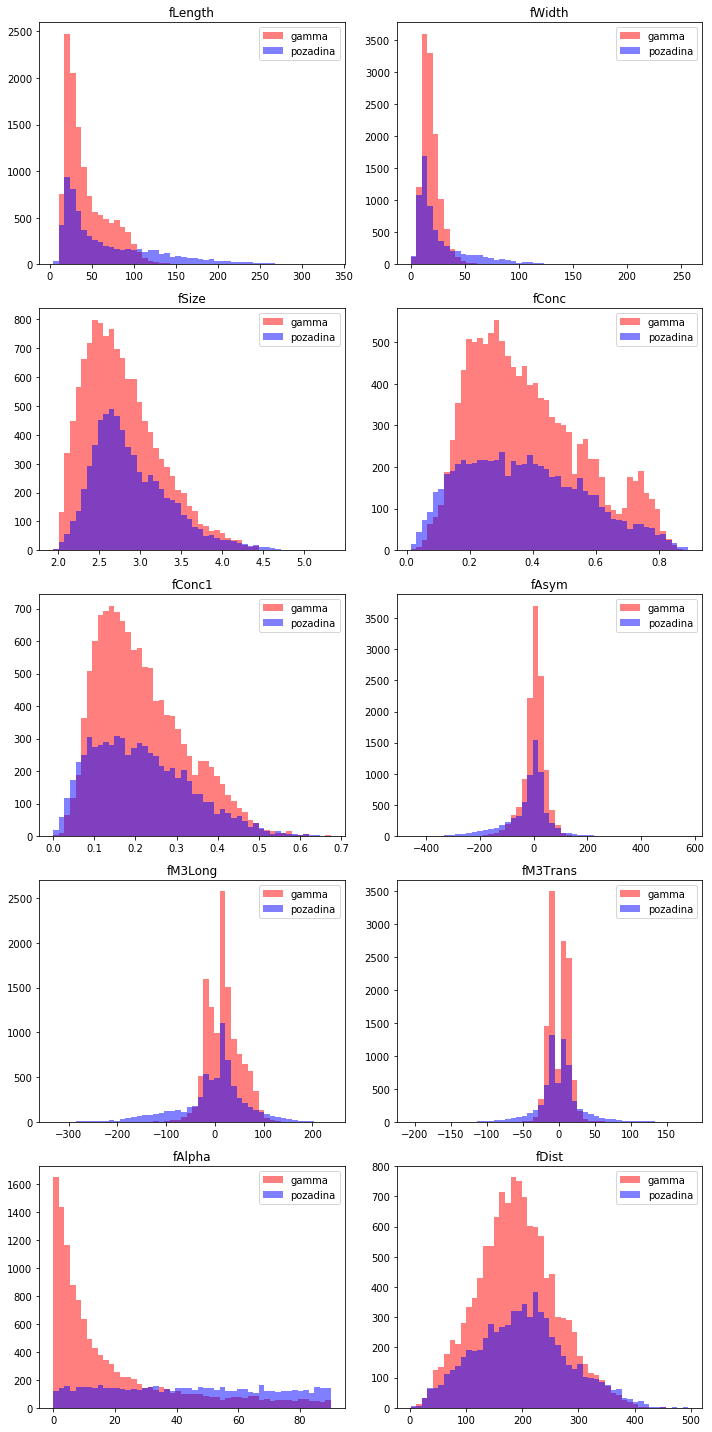

In [9]:
gamma = data.loc[ data['class'] == 'g', : ]
pozadina = data.loc[ data['class'] == 'h', : ]

fig, axes = plt.subplots(5, 2, figsize=(10, 20))
ax = axes.ravel() # axes are 2-dimensional so we unfold them
for i in range(10):
    _, bins = np.histogram(data.iloc[:,i], bins=50)
    ax[i].hist(gamma.iloc[:,i], bins=bins, color='r', alpha=.5, label='gamma')
    ax[i].hist(pozadina.iloc[:,i], bins=bins, color='b', alpha=.5, label='pozadina')
    ax[i].set_title(data.columns.values[i])
    #ax[i].set_yticks(()) # remove ticks on y-axis
    ax[i].legend(loc='upper right')
fig.tight_layout()


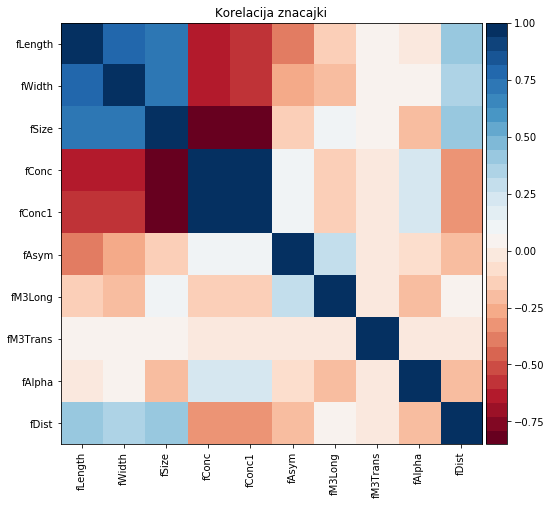

In [10]:
from matplotlib import cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

X_corr = data.drop('class',axis=1).corr()
cmap = cm.get_cmap('RdBu', 30)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
iax = ax.imshow(X_corr, interpolation="nearest", cmap=cmap)
ax.grid(False)
ax.set(title='Korelacija znacajki')
ax.set_xticks(range(X_corr.shape[1]))
ax.set_xticklabels(data.drop('class',axis=1).columns.values, rotation=90)
ax.set_yticks(range(X_corr.shape[1]))
ax.set_yticklabels(data.drop('class',axis=1).columns.values)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(iax,cax)

plt.show()

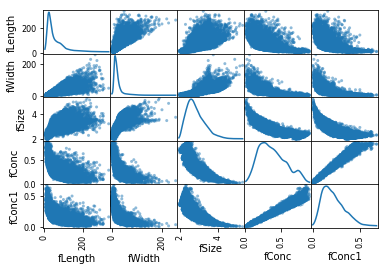

In [11]:
pd.plotting.scatter_matrix(data.loc[:, 'fLength': 'fConc1'], diagonal="kde")
plt.show()

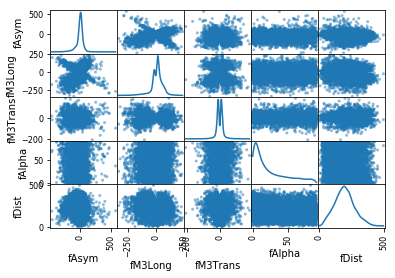

In [12]:
pd.plotting.scatter_matrix(data.loc[:, 'fAsym': 'fDist'], diagonal="kde")
plt.show()

In [13]:
datag = data.loc[data['class'] == 'g']
datag.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [14]:
datah = data.loc[data['class'] == 'h']
datah.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
12332,93.7035,37.9432,3.1454,0.1680,0.1011,53.2566,89.0566,11.8175,14.1224,231.9028,h
12333,102.0005,22.0017,3.3161,0.1064,0.0724,-54.0862,43.0553,-15.0647,88.4636,274.9392,h
12334,100.2775,21.8784,3.1100,0.3120,0.1446,-48.1834,57.6547,-9.6341,20.7848,346.4330,h
12335,91.6558,18.8293,2.7097,0.4386,0.3420,-52.6841,-97.8373,-17.0955,63.8834,130.7998,h
12336,38.0195,12.6736,2.8747,0.4084,0.1928,-51.4840,8.3471,7.9620,24.5402,163.8674,h


In [15]:
import seaborn as sns
sns.color_palette("tab10", n_colors=10)
boje = sns.color_palette("tab10", n_colors=2)
blue = boje[0]
orange = boje[1]

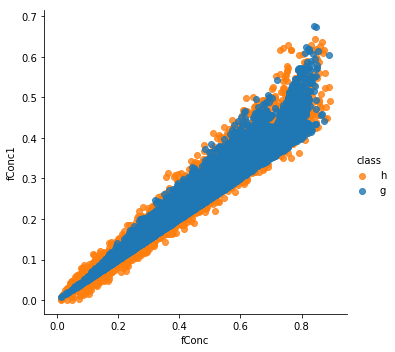

In [16]:
sns.lmplot('fConc', 'fConc1', data, hue='class', fit_reg=False, hue_order=['h', 'g'], palette=[orange, blue]);

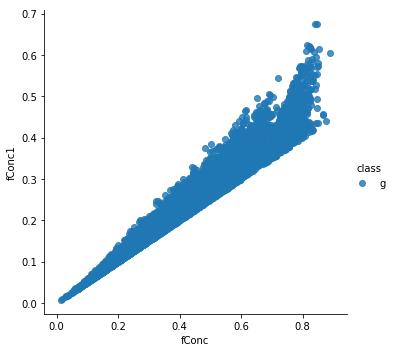

In [17]:
sns.lmplot('fConc', 'fConc1', datag, hue='class', fit_reg=False);

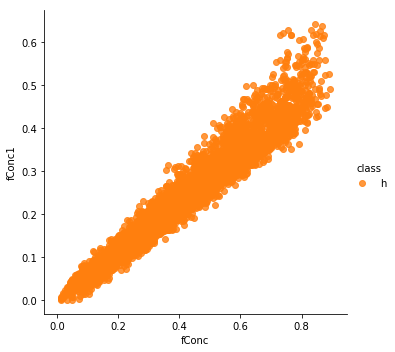

In [18]:
sns.lmplot('fConc', 'fConc1', datah, hue='class', fit_reg=False, palette=[orange]);

(-350, 250)

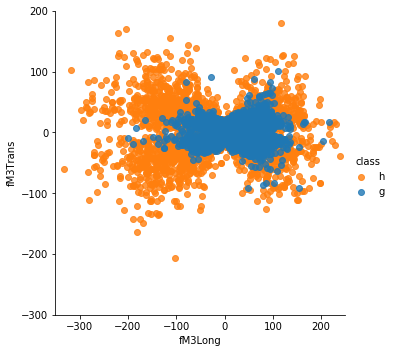

In [19]:
lm1 = sns.lmplot('fM3Long', 'fM3Trans', data, hue='class', hue_order=['h', 'g'], fit_reg=False, 
                 palette=[orange, blue]);
axes = lm1.axes
axes[0, 0].set_ylim(-300,200)
axes[0, 0].set_xlim(-350, 250)

(-350, 250)

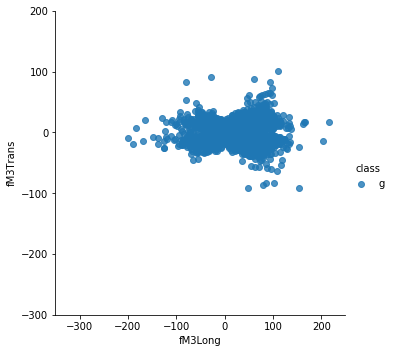

In [20]:
lm1 = sns.lmplot('fM3Long', 'fM3Trans', datag, hue='class', fit_reg=False);
axes = lm1.axes
axes[0, 0].set_ylim(-300,200)
axes[0, 0].set_xlim(-350, 250)

(-350, 250)

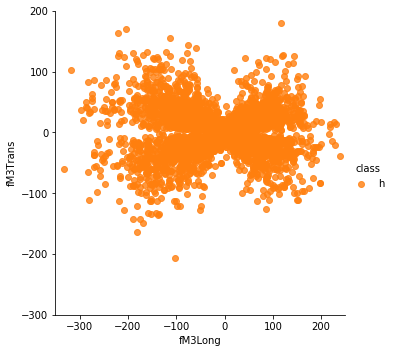

In [21]:
lm1 = sns.lmplot('fM3Long', 'fM3Trans', datah, hue='class', fit_reg=False, palette=[orange]);
axes = lm1.axes
axes[0, 0].set_ylim(-300,200)
axes[0, 0].set_xlim(-350, 250)

(-350, 250)

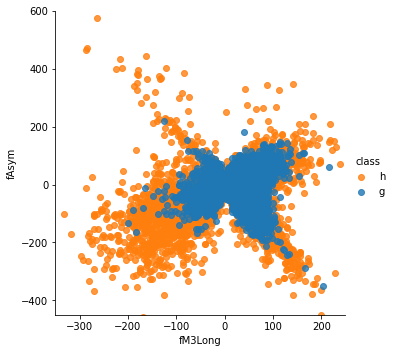

In [22]:
lm2 = sns.lmplot('fM3Long', 'fAsym', data, hue='class', fit_reg=False, hue_order=['h', 'g'], palette=[orange, blue]);
axes = lm2.axes
axes[0, 0].set_ylim(-450,600)
axes[0, 0].set_xlim(-350, 250)

(-350, 250)

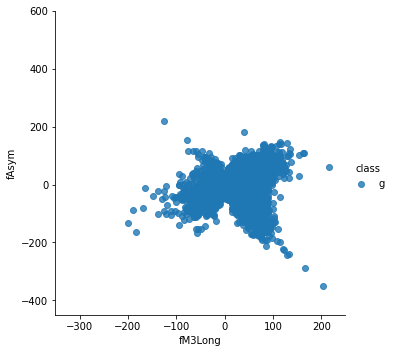

In [23]:
lm2 = sns.lmplot('fM3Long', 'fAsym', datag, hue='class', fit_reg=False);
axes = lm2.axes
axes[0, 0].set_ylim(-450,600)
axes[0, 0].set_xlim(-350, 250)

(-350, 250)

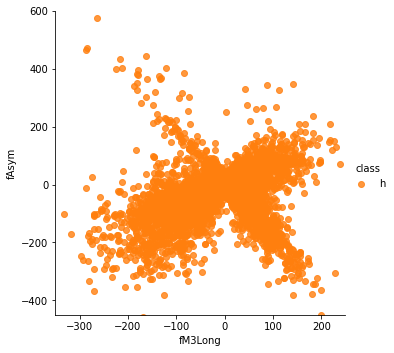

In [24]:
lm2 = sns.lmplot('fM3Long', 'fAsym', datah, hue='class', fit_reg=False, palette=[orange]);
axes = lm2.axes
axes[0, 0].set_ylim(-450,600)
axes[0, 0].set_xlim(-350, 250)